In [0]:
from sklearn import datasets
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

% matplotlib
# from csv import reader
 
# # Load a CSV file
# def load_csv(filename):
# 	dataset = list()
# 	with open(filename, 'r') as file:
# 		csv_reader = reader(file)
# 		for row in csv_reader:
# 			if not row:
# 				continue
# 			dataset.append(row)
# 	return dataset
from google.colab import files

excel = files.upload()

x = np.divide(np.array(pd.read_csv(io.BytesIO(excel['01_heights_weights_genders.csv']), header=0, usecols=['Weight', 'Height'])), 100);
genders = np.array(pd.read_csv(io.BytesIO(excel['01_heights_weights_genders.csv']), header=0, usecols=['Gender']));

n = 10000;
expected = np.array([1 if i == 'Male' else -1 for i in genders]).reshape(1, n);

Weight = np.array([1, 1]).reshape(2, 1);
bias = 1;
Learning_Rate = 0.1;
Round = 0;
Error = []

while True:

    out = (np.add(x.dot(Weight), bias)).T
    
    misclassified_count = (np.count_nonzero(out[:1] * expected[:1] < 0))

    e = np.divide(np.subtract(expected, x.dot(Weight).T), n)

    delta = np.dot(Learning_Rate, (e.dot(x)).T)

    Weight = np.add(Weight, delta)

    bias = np.add(bias, Learning_Rate * np.average(np.subtract(expected, out)))

    Error.append((1 / 2) * (np.average(e) ** 2))

    Round += 1
    if np.all(abs(delta) < 0.001):
        break

print("Epochs:", Round)
print("weights:", Weight.T)
print(f'bias:{bias:.3}')
print("Accuracy:", ((n - misclassified_count) / n) * 100, "%")






Using matplotlib backend: agg


Saving 01_heights_weights_genders.csv to 01_heights_weights_genders (3).csv
Epochs: 2457
weights: [[-6.99628568  2.88915119]]
bias:-0.0212
Accuracy: 91.93 %


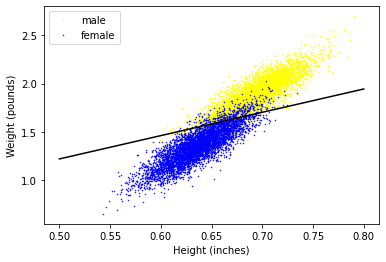

In [0]:

plt.plot(x[:4999,0],x[:4999,1],'bo', markersize = 0.5,color = 'yellow',label='male')
plt.plot(x[5000:,0],x[5000:,1],'bo',color='blue', markersize=0.5,label='female')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
x_points = np.linspace(0.5,0.8,10)
y_ = -(w[0]*x_points + b)/w[1]
plt.plot(x_points, y_,color = 'black')


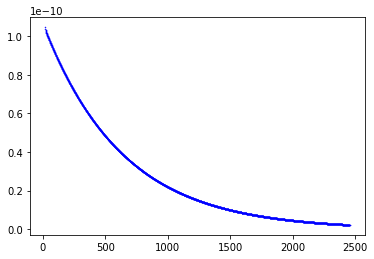

In [0]:
E = np.array(Error)
N = np.arange(Round)

plt.plot(N[20:],E[20:],'bo',markersize = 0.5)